# **Use YOLO : Object Detection !**

## 0.미션


In [ ]:
#########################################################
#                                                       #
#  폴더를 다 날리고 새롭게 시작하고 싶을 때,,, (!!취급주의!!)  #
#                                                       #
#########################################################

import shutil
import os

# 삭제할 폴더 경로
folder_path = '/content/jaeyub_face'

# 폴더가 존재하면 삭제
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} 폴더가 삭제되었습니다.")
else:
    print(f"{folder_path} 폴더가 존재하지 않습니다.")

/content/jaeyub_face 폴더가 삭제되었습니다.


### (1) 미션1
여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 주어진 데이터셋은 2가지입니다. 해당 데이터셋의 압축 파일을 해제해야 합니다.
        1. [Face_Recognition_1](https://universe.roboflow.com/new-workspace-kuixc/face-recognition-dataset/dataset/1).zip
        2. [Face_Recognition_2](https://universe.roboflow.com/td-vgaen/test-uiodm/dataset/2).zip
        - 압축 파일을 로컬에 다운로드 받아서 **어떤 구조**인지 확인하세요.
    - **여러분의 얼굴 이미지와 라벨링 작업까지 마친 파일 역시 데이터셋으로 압축하여 Google Colab에서 해제해주세요.**
- 2) 데이터셋을 전처리합니다.
    - UltraLytics YOLO 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/detect/)
- 3) YAML 파일을 생성합니다.
    - 전처리까지 완료한 데이터셋의 구조를 YAML 파일에 저장합니다.

### (2) 미션2
데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO 모델 링크](https://docs.ultralytics.com/tasks/detect/)
- 2) 선택한 UltraLytics YOLO 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/미니프로젝트4차'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [3]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 13.5 MB/s eta 0:00:00


## 2.미션1

여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 주어진 데이터셋은 2가지입니다. 해당 데이터셋의 압축 파일을 해제해야 합니다.
        1. [Face_Recognition_1](https://universe.roboflow.com/new-workspace-kuixc/face-recognition-dataset/dataset/1).zip
        2. [Face_Recognition_2](https://universe.roboflow.com/td-vgaen/test-uiodm/dataset/2).zip
        - 압축 파일을 로컬에 다운로드 받아서 **어떤 구조**인지 확인하세요.
    - **여러분의 얼굴 이미지와 라벨링 작업까지 마친 파일 역시 데이터셋으로 압축하여 Google Colab에서 해제해주세요.**
- 2) 데이터셋을 전처리합니다.
    - UltraLytics YOLO 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/detect/)
- 3) YAML 파일을 생성합니다.
    - 전처리까지 완료한 데이터셋의 구조를 YAML 파일에 저장합니다.

### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러옵니다.
        - 주어진 데이터셋은 2가지입니다. 해당 데이터셋의 압축 파일을 해제해야 합니다.
            1. [Face_Recognition_1](https://universe.roboflow.com/new-workspace-kuixc/face-recognition-dataset/dataset/1).zip
            2. [Face_Recognition_2](https://universe.roboflow.com/td-vgaen/test-uiodm/dataset/2).zip
            - 압축 파일을 로컬에 다운로드 받아서 **어떤 구조**인지 확인하세요.
        - **여러분의 얼굴 이미지와 라벨링 작업까지 마친 파일 역시 데이터셋으로 압축하여 Google Colab에서 해제해주세요.**
    - 데이터셋 압축 파일을 가급적 **Colab에 폴더를 생성한 후 해제**하세요.
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

#### 1) 데이터셋 불러오기

In [ ]:
import zipfile

# 압축 해제할 파일 경로 및 대상 디렉터리 경로 설정
zip_paths = [
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/Face_Recognition_1.zip", # Other
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/Face_Recognition_2.zip", # Other
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/jaeyub_face.zip", # jaeyub
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/LJH_face.zip",  # jonghwan
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/minkyu_face.zip", #minkyu
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/project4_miso4.zip", # miso
    "/content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/taegyoeng3800_face_classes_3.zip" # taegyeong
]
extract_paths = [
    "/content/Face_Recognition_1",
    "/content/Face_Recognition_2",
    "/content/jaeyub_face",
    "/content/jonghwan_face",
    "/content/minkyu_face",
    "/content/miso_face",
    "/content/taegyeong_face",
]

# 각 zip 파일을 해당 디렉터리에 압축 해제
for zip_path, extract_path in zip(zip_paths, extract_paths):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted {zip_path} to {extract_path}")


Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/Face_Recognition_1.zip to /content/Face_Recognition_1
Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/Face_Recognition_2.zip to /content/Face_Recognition_2
Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/jaeyub_face.zip to /content/jaeyub_face
Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/LJH_face.zip to /content/jonghwan_face
Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/minkyu_face.zip to /content/minkyu_face
Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/project4_miso4.zip to /content/miso_face
Extracted /content/drive/MyDrive/미니프로젝트4차/Datasets/YOLO/taegyoeng3800_face_classes_3.zip to /content/taegyeong_face


In [ ]:
import os

# Face_Recognition_1과 Face_Recognition_2 디렉터리 설정
face_recognition_1_dirs = {
    "train": "/content/Face_Recognition_1/train/images",
    "test": "/content/Face_Recognition_1/test/images",
    "valid": "/content/Face_Recognition_1/valid/images"
}

face_recognition_2_dirs = {
    "train": "/content/Face_Recognition_2/train/images",
    "test": "/content/Face_Recognition_2/test/images",
    "valid": "/content/Face_Recognition_2/valid/images"
}

# 이미지 개수 세는 함수
def count_images(image_dirs):
    counts = {}
    for name, dir_path in image_dirs.items():
        if os.path.exists(dir_path):
            counts[name] = len([file for file in os.listdir(dir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        else:
            counts[name] = 0  # 디렉터리가 없으면 0으로 설정
    return counts

# 비율 계산 함수
def calculate_ratios(counts):
    total = sum(counts.values())
    if total > 0:
        return {k: v / total for k, v in counts.items()}
    else:
        return {k: 0 for k in counts.keys()}

# Face_Recognition_1과 Face_Recognition_2 이미지 개수 및 비율 계산
face_recognition_1_counts = count_images(face_recognition_1_dirs)
face_recognition_2_counts = count_images(face_recognition_2_dirs)

face_recognition_1_ratios = calculate_ratios(face_recognition_1_counts)
face_recognition_2_ratios = calculate_ratios(face_recognition_2_counts)

# 결과 출력
print("Face_Recognition_1 이미지 개수:", face_recognition_1_counts)
print("Face_Recognition_1 비율:", face_recognition_1_ratios)
print("Face_Recognition_2 이미지 개수:", face_recognition_2_counts)
print("Face_Recognition_2 비율:", face_recognition_2_ratios)


Face_Recognition_1 이미지 개수: {'train': 5214, 'test': 256, 'valid': 509}
Face_Recognition_1 비율: {'train': 0.8720521826392373, 'test': 0.04281652450242515, 'valid': 0.08513129285833751}
Face_Recognition_2 이미지 개수: {'train': 3489, 'test': 497, 'valid': 997}
Face_Recognition_2 비율: {'train': 0.7001806140878989, 'test': 0.0997391129841461, 'valid': 0.20008027292795505}


### (2) 데이터셋 전처리

* **세부 요구사항**
    - Label 파일, 즉 txt 파일의 클래스를 수정하셔야 합니다.
        - 여러 클래스로 구분되어 있는 것을 하나로 통일해주세요.
        - 이것은 **다른 사람의 얼굴**에 대해 전처리하는 작업입니다.
    - UltraLytics YOLO 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/detect/)
    - 예시 코드에서 사용한 라이브러리
        - os, glob, random, shutil, numpy

#### 1) Label 파일의 클래스 값 변경

In [ ]:
import os

# 라벨 파일이 저장된 각 경로 설정
label_paths = [
    '/content/Face_Recognition_1/train/labels',
    '/content/Face_Recognition_1/test/labels',
    '/content/Face_Recognition_1/valid/labels'
]

# 라벨을 저장할 세트 초기화
unique_labels = set()

# 각 경로에 있는 .txt 파일을 순회하며 라벨 ID 추출
for path in label_paths:
    if os.path.exists(path):
        txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]
        print(f"Found {len(txt_files)} .txt files in {path}")

        for file_name in txt_files:
            file_path = os.path.join(path, file_name)
            with open(file_path, 'r') as file:
                for line in file:
                    # 라벨 ID 추출
                    label_id = line.split()[0]
                    unique_labels.add(label_id)

# 고유한 라벨 수와 라벨 목록 출력
print(f"Number of unique labels: {len(unique_labels)}")
print("Unique labels:", unique_labels)


Found 5214 .txt files in /content/Face_Recognition_1/train/labels
Found 256 .txt files in /content/Face_Recognition_1/test/labels
Found 509 .txt files in /content/Face_Recognition_1/valid/labels
Number of unique labels: 1
Unique labels: {'0'}


In [ ]:
import os

# 라벨 파일이 저장된 각 경로 설정
label_paths = [
    '/content/Face_Recognition_1/train/labels',
    '/content/Face_Recognition_1/test/labels',
    '/content/Face_Recognition_1/valid/labels'
]

# 모든 라벨을 0으로 변경하는 작업
for path in label_paths:
    if os.path.exists(path):
        txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]
        print(f"Processing {len(txt_files)} .txt files in {path}")

        for file_name in txt_files:
            file_path = os.path.join(path, file_name)

            # 파일 내용 읽기
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # 각 줄의 첫 번째 값을 0으로 변경
            updated_lines = []
            for line in lines:
                parts = line.split()
                if parts:  # 라인이 비어 있지 않은 경우
                    parts[0] = '0'  # 라벨 ID를 0으로 설정
                    updated_lines.append(' '.join(parts) + '\n')

            # 파일에 다시 저장
            with open(file_path, 'w') as file:
                file.writelines(updated_lines)

print("All label IDs have been changed to 0.")

Processing 5214 .txt files in /content/Face_Recognition_1/train/labels
Processing 256 .txt files in /content/Face_Recognition_1/test/labels
Processing 509 .txt files in /content/Face_Recognition_1/valid/labels
All label IDs have been changed to 0.


In [ ]:
import os

# 라벨 파일이 저장된 각 경로 설정
label_paths = [
    '/content/Face_Recognition_2/train/labels',
    '/content/Face_Recognition_2/test/labels',
    '/content/Face_Recognition_2/valid/labels'
]

# 라벨을 저장할 세트 초기화
unique_labels = set()

# 각 경로에 있는 .txt 파일을 순회하며 라벨 ID 추출
for path in label_paths:
    if os.path.exists(path):
        txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]
        print(f"Found {len(txt_files)} .txt files in {path}")

        for file_name in txt_files:
            file_path = os.path.join(path, file_name)
            with open(file_path, 'r') as file:
                for line in file:
                    # 라벨 ID 추출
                    label_id = line.split()[0]
                    unique_labels.add(label_id)

# 고유한 라벨 수와 라벨 목록 출력
print(f"Number of unique labels: {len(unique_labels)}")
print("Unique labels:", unique_labels)


Found 3489 .txt files in /content/Face_Recognition_2/train/labels
Found 497 .txt files in /content/Face_Recognition_2/test/labels
Found 997 .txt files in /content/Face_Recognition_2/valid/labels
Number of unique labels: 1
Unique labels: {'0'}


In [ ]:
import os

# 라벨 파일이 저장된 각 경로 설정
label_paths = [
    '/content/Face_Recognition_2/train/labels',
    '/content/Face_Recognition_2/test/labels',
    '/content/Face_Recognition_2/valid/labels'
]

# 모든 라벨을 0으로 변경하는 작업
for path in label_paths:
    if os.path.exists(path):
        txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]
        print(f"Processing {len(txt_files)} .txt files in {path}")

        for file_name in txt_files:
            file_path = os.path.join(path, file_name)

            # 파일 내용 읽기
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # 각 줄의 첫 번째 값을 0으로 변경
            updated_lines = []
            for line in lines:
                parts = line.split()
                if parts:  # 라인이 비어 있지 않은 경우
                    parts[0] = '0'  # 라벨 ID를 0으로 설정
                    updated_lines.append(' '.join(parts) + '\n')

            # 파일에 다시 저장
            with open(file_path, 'w') as file:
                file.writelines(updated_lines)

print("All label IDs have been changed to 0.")

Processing 3489 .txt files in /content/Face_Recognition_2/train/labels
Processing 497 .txt files in /content/Face_Recognition_2/test/labels
Processing 997 .txt files in /content/Face_Recognition_2/valid/labels
All label IDs have been changed to 0.


In [ ]:
import os

# 라벨 파일이 저장된 각 경로 설정
label_paths = [
    '/content/jaeyub_face/train/labels',
    '/content/jaeyub_face/test/labels',
    '/content/jaeyub_face/valid/labels'
]

# 모든 라벨을 0으로 변경하는 작업
for path in label_paths:
    if os.path.exists(path):
        txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]
        print(f"Processing {len(txt_files)} .txt files in {path}")

        for file_name in txt_files:
            file_path = os.path.join(path, file_name)

            # 파일 내용 읽기
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # 각 줄의 첫 번째 값을 0으로 변경
            updated_lines = []
            for line in lines:
                parts = line.split()
                if parts:  # 라인이 비어 있지 않은 경우
                    parts[0] = '1'  # 라벨 ID를 0으로 설정
                    updated_lines.append(' '.join(parts) + '\n')

            # 파일에 다시 저장
            with open(file_path, 'w') as file:
                file.writelines(updated_lines)

print("All label IDs have been changed to 1.")

Processing 303 .txt files in /content/jaeyub_face/train/labels
Processing 15 .txt files in /content/jaeyub_face/test/labels
Processing 29 .txt files in /content/jaeyub_face/valid/labels
All label IDs have been changed to 1.


In [ ]:
import os

# 라벨을 확인할 이름 리스트
names = ['jaeyub', 'minkyu', 'taegyeong','miso','jonghwan']

'''
1 : 전재엽
2 : 정민규
3 : 김태경
4 : 백미소
5 : 이종환
'''

# 각 이름별로 라벨 확인
for name in names:
    # 라벨 파일이 저장된 각 경로 설정
    label_paths = [
        f'/content/{name}_face/train/labels',
        f'/content/{name}_face/test/labels',
        f'/content/{name}_face/valid/labels'
    ]

    # 라벨을 저장할 세트 초기화
    unique_labels = set()

    # 각 경로에 있는 .txt 파일을 순회하며 라벨 ID 추출
    for path in label_paths:
        if os.path.exists(path):
            txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]

            for file_name in txt_files:
                file_path = os.path.join(path, file_name)
                with open(file_path, 'r') as file:
                    for line in file:
                        # 라벨 ID 추출
                        label_id = line.split()[0]
                        unique_labels.add(label_id)

    # 고유한 라벨 수와 라벨 목록 출력
    print(f"{name}_face Label : {unique_labels}")


jaeyub_face Label : {'1'}
minkyu_face Label : {'2'}
taegyeong_face Label : {'3'}
miso_face Label : {'4'}
jonghwan_face Label : {'5'}


#### 2) 모델이 요하는 구조의 폴더 생성

In [ ]:
import os

## 생성될 폴더의 경로
dataset = '/content/dataset'
train_data = '/content/dataset/train'
test_data = '/content/dataset/test'
val_data = '/content/dataset/valid'

## 폴더가 존재하지 않을 때 폴더를 생성
if not os.path.exists(dataset) :
    os.makedirs(dataset)

if not os.path.exists(train_data) :
    os.makedirs(train_data)

if not os.path.exists(test_data) :
    os.makedirs(test_data)

if not os.path.exists(val_data) :
    os.makedirs(val_data)

# 하위 폴더 생성
tr_images = train_data + '/images'
tr_labels = train_data + '/labels'
te_images = test_data + '/images'
te_labels = test_data + '/labels'
val_images = val_data + '/images'
val_labels = val_data + '/labels'
for f in [tr_images,tr_labels,te_images,te_labels,val_images,val_labels] :
    if not os.path.exists(f) :
        os.makedirs(f)

#### 3) 각 폴더에 데이터 옮기기

In [ ]:
import os
import shutil

# 원본 폴더 경로
source_dirs = ['/content/Face_Recognition_1',
               '/content/Face_Recognition_2',
               '/content/jaeyub_face',
               '/content/minkyu_face',
               '/content/miso_face',
               '/content/taegyeong_face'
               ]
# 대상 폴더 경로
target_dir = '/content/dataset'

# 데이터셋 구조를 미리 생성
for subset in ['train', 'test', 'valid']:
    os.makedirs(os.path.join(target_dir, subset, 'images'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, subset, 'labels'), exist_ok=True)

# 파일을 이동하는 함수
def move_files(source_dirs, target_dir):
    for source_dir in source_dirs:
        for subset in ['train', 'test', 'valid']:
            for category in ['images', 'labels']:
                source_path = os.path.join(source_dir, subset, category)
                target_path = os.path.join(target_dir, subset, category)

                if os.path.exists(source_path):
                    for filename in os.listdir(source_path):
                        source_file = os.path.join(source_path, filename)
                        target_file = os.path.join(target_path, filename)

                        # 파일 이동
                        shutil.move(source_file, target_file)
                        print(f'Moved {source_file} to {target_file}')

# 파일 이동 실행
move_files(source_dirs, target_dir)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved /content/taegyeong_face/train/images/taegyeoong_1733_jpg.rf.48e5a6ecd35c1c031bc2c2062bc80216.jpg to /content/dataset/train/images/taegyeoong_1733_jpg.rf.48e5a6ecd35c1c031bc2c2062bc80216.jpg
Moved /content/taegyeong_face/train/images/taegyeoonng_916_jpg.rf.8c61ba9a8c7903d6e7099cf129e0cd86.jpg to /content/dataset/train/images/taegyeoonng_916_jpg.rf.8c61ba9a8c7903d6e7099cf129e0cd86.jpg
Moved /content/taegyeong_face/train/images/taegyeoonng_82_jpg.rf.4e4cbfff16da2d8ab2602d9abfc5d959.jpg to /content/dataset/train/images/taegyeoonng_82_jpg.rf.4e4cbfff16da2d8ab2602d9abfc5d959.jpg
Moved /content/taegyeong_face/train/images/taegyeoonng_275_jpg.rf.4f70650f8647d9fe85f98fa6e0b7a279.jpg to /content/dataset/train/images/taegyeoonng_275_jpg.rf.4f70650f8647d9fe85f98fa6e0b7a279.jpg
Moved /content/taegyeong_face/train/images/taegyeoonng_981_jpg.rf.f90772a72e22e75e6d5b1780b3994afc.jpg to /content/dataset/train/images/taegyeoonng_981_jpg.rf.f90772a72e22e75e6d5b178

In [ ]:
import os
import glob
from collections import defaultdict

# 데이터셋 경로
dataset_path = '/content/dataset'
subsets = ['train', 'test', 'valid']
classes = ['other_face', 'jaeyub_face', 'minkyu_face', 'taegyeong_face', 'miso_face', 'jonghwan_face']

# 클래스별 파일 개수를 저장할 딕셔너리 초기화
class_counts = {subset: defaultdict(int) for subset in subsets}

# 각 subset의 클래스별 파일 개수 확인
for subset in subsets:
    label_path = os.path.join(dataset_path, subset, 'labels')
    label_files = glob.glob(os.path.join(label_path, '*.txt'))

    for label_file in label_files:
        with open(label_file, 'r') as file:
            for line in file:
                class_index = int(line.split()[0])  # 첫 번째 값이 클래스 인덱스
                class_name = classes[class_index]
                class_counts[subset][class_name] += 1

# 결과 출력
for subset in subsets:
    print(f"\n{subset.capitalize()} set class counts:")
    for class_name, count in class_counts[subset].items():
        print(f"  {class_name}: {count} instances")



Train set class counts:
  other_face: 22851 instances
  miso_face: 2853 instances
  taegyeong_face: 3330 instances
  minkyu_face: 2139 instances
  jaeyub_face: 303 instances

Test set class counts:
  other_face: 986 instances
  miso_face: 135 instances
  minkyu_face: 102 instances
  taegyeong_face: 156 instances
  jaeyub_face: 15 instances

Valid set class counts:
  other_face: 2027 instances
  taegyeong_face: 316 instances
  miso_face: 275 instances
  minkyu_face: 204 instances
  jaeyub_face: 29 instances


### (3) YAML 파일 생성

* **세부 요구사항**
    - 데이터셋의 구조를 YAML 파일에 작성하여 저장합니다.
    - 예시 코드에서 사용한 라이브러리
        - yaml(pyyaml)

#### 1) 데이터셋 구조 코드 작성

#### 2) YAML 파일 작성

In [ ]:
import shutil
import yaml

# 원본 파일 경로
source_file = '/content/drive/MyDrive/미니프로젝트4차/data.yaml'
# 대상 폴더 경로
target_dir = '/content/dataset'

# 파일 복사
shutil.copy(source_file, target_dir)
print(f'Copied {source_file} to {target_dir}')

Copied /content/drive/MyDrive/미니프로젝트4차/data.yaml to /content/dataset


## 3.미션2

데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO 모델 링크](https://docs.ultralytics.com/tasks/detect/)
- 2) 선택한 UltraLytics YOLO 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

#### (1) UltraLytics YOLO 모델 선택

* **세부 요구사항**
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO 모델 링크](https://docs.ultralytics.com/tasks/detect/)

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#### (2) UltraLytics YOLO 모델 학습

* **세부 요구사항**
    - 선택한 UltraLytics YOLO 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

# Train the model
results = model.train(data="/content/dataset/data.yaml", epochs=20, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 62.8MB/s]


Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 11.7MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 53.1MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 17328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17328/17328 [00:14<00:00, 1229.69it/s]

train: WARNING ⚠️ /content/dataset/train/images/101_jpg.rf.2aa06eef8b9ca525c79d95b850d4731e.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/101_jpg.rf.ce5e4e6b57bc677ce7bcf64e2518406b.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/101_jpg.rf.f70f6248027a8d737a7f7b2ec28111b9.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/101_jpg.rf.fb740afda1f63d2f6450b0da13578a16.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/104_jpg.rf.49ae690eecf36cc827aac3ad9266ec6f.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/104_jpg.rf.4a4acc1060b0edb1af657a31eb0ba66f.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/104_jpg.rf.4ae41e9ad0b7b779e23053f56fd57db4.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/104_jpg.rf.8c9b911ed818f376c24a78fd7535bce3.jpg: 2 duplicate labels removed
train: W

train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 2330 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2330/2330 [00:02<00:00, 1119.25it/s]

val: WARNING ⚠️ /content/dataset/valid/images/101_jpg.rf.0c79e60d76da39414a878e3c8eba93b6.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/101_jpg.rf.a4e0cf4048b12af6de1cf704347633a8.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/101_jpg.rf.e2d0f1219bacc6f23180499da22819f2.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/104_jpg.rf.10e2d17c910a32c5d56684c8cb7f8d99.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/107_jpg.rf.e77103317fcb9216e223bdb59bf1637c.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/10_jpg.rf.32f43afbc6e7e6a64e279850c6481c16.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/10_jpg.rf.712665aca3ab328efab722201dd92bad.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/dataset/valid/images/10_jpg.rf.7f92b55df121d3fb2bd1496a75d974db.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/da

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.26G     0.5787      1.328      1.148         55        640:  76%|███████▌  | 823/1083 [01:24<00:26,  9.78it/s]


KeyboardInterrupt: 

#### (3) UltraLytics YOLO 추론

* **세부 요구사항**
    - 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/)

#### (4) UltraLytics YOLO 모델 저장

* **세부 요구사항**
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

In [ ]:
model.save("./YOLO_obj.pt")

## EXTRA


#### 데이터 확인

In [ ]:
import os

# 이름 리스트
names = ['jaeyub', 'miso', 'jonghwan','minkyu','taegyeong']

# 각 이름별로 파일 개수 확인
for name in names:
    # 이미지 파일이 저장된 각 경로 설정
    image_paths = [
        f'/content/{name}_face/train/images',
        f'/content/{name}_face/test/images',
        f'/content/{name}_face/valid/images'
    ]

    # 각 세트의 파일 개수 출력
    for path in image_paths:
        if os.path.exists(path):
            files = os.listdir(path)
            print(f"{name}_face - {path.split('/')[-2]}: {len(files)} files")
        else:
            print(f"Path not found: {path}")

jaeyub_face - train: 303 files
jaeyub_face - test: 15 files
jaeyub_face - valid: 29 files
miso_face - train: 2853 files
miso_face - test: 135 files
miso_face - valid: 275 files
jonghwan_face - train: 2559 files
jonghwan_face - test: 125 files
jonghwan_face - valid: 251 files
minkyu_face - train: 2139 files
minkyu_face - test: 102 files
minkyu_face - valid: 204 files
taegyeong_face - train: 3330 files
taegyeong_face - test: 156 files
taegyeong_face - valid: 316 files


In [ ]:
import os

# 상위 폴더 리스트
folders = ['/content/Face_Recognition_1', '/content/Face_Recognition_2']

# 각 상위 폴더에 대해 평균 라벨 개수 확인
for folder in folders:
    # 라벨 파일이 저장된 각 경로 설정
    label_paths = {
        'train': os.path.join(folder, 'train', 'labels'),
        'test': os.path.join(folder, 'test', 'labels'),
        'valid': os.path.join(folder, 'valid', 'labels')
    }

    print(f"Processing folder: {folder}")

    # 각 세트에 대해 평균 라벨 수 계산
    for set_name, path in label_paths.items():
        total_labels = 0
        total_files = 0

        if os.path.exists(path):
            txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]

            # 각 파일에 있는 라벨 개수 확인
            for file_name in txt_files:
                file_path = os.path.join(path, file_name)
                with open(file_path, 'r') as file:
                    label_count = sum(1 for line in file)  # 각 파일의 라벨 개수
                    total_labels += label_count
                    total_files += 1

        # 평균 라벨 수 계산
        if total_files > 0:
            average_labels_per_file = total_labels / total_files
        else:
            average_labels_per_file = 0

        print(f"{set_name.capitalize()} - Average labels per .txt file: {average_labels_per_file:.2f}")
    print("\n")


Processing folder: /content/Face_Recognition_1
Train - Average labels per .txt file: 3.39
Test - Average labels per .txt file: 1.00
Valid - Average labels per .txt file: 1.00


Processing folder: /content/Face_Recognition_2
Train - Average labels per .txt file: 1.48
Test - Average labels per .txt file: 1.47
Valid - Average labels per .txt file: 1.52




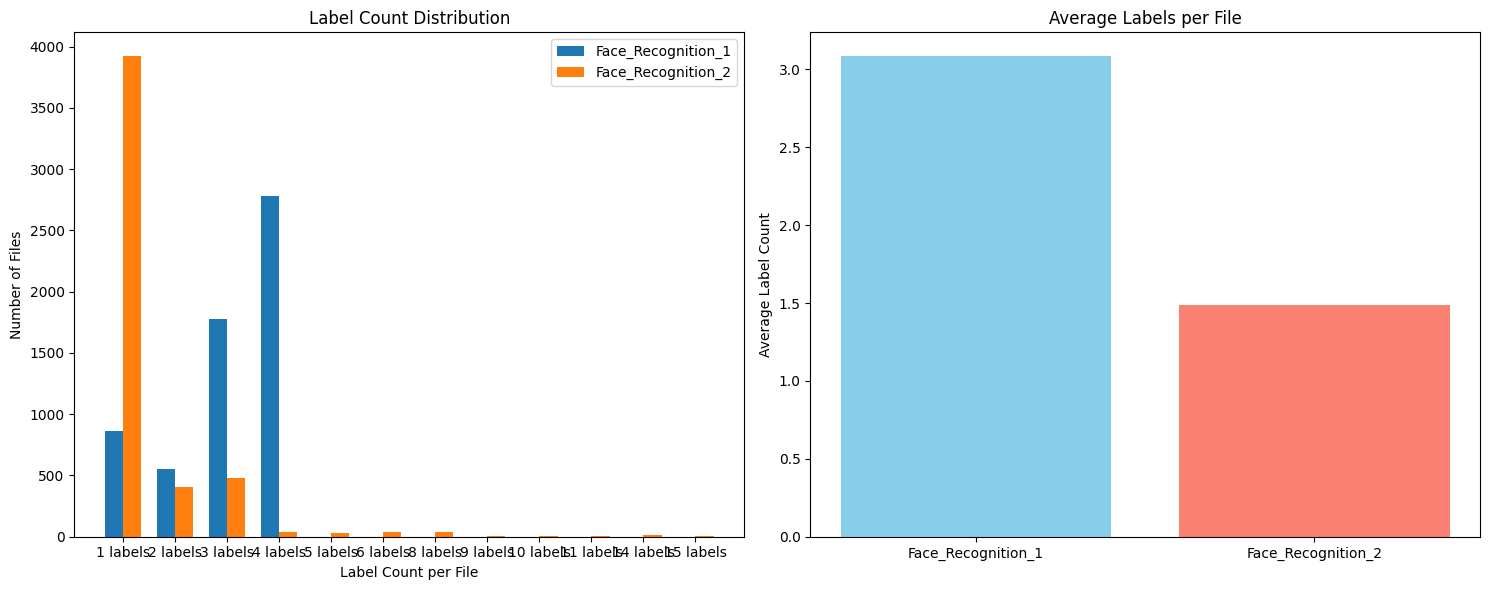

In [ ]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# 상위 폴더 리스트
folders = ['/content/Face_Recognition_1', '/content/Face_Recognition_2']
folder_names = ['Face_Recognition_1', 'Face_Recognition_2']
label_count_data = {}  # 라벨 개수별 파일 수를 저장할 딕셔너리
average_labels = []  # 각 폴더의 평균 라벨 수를 저장할 리스트

# 각 상위 폴더에 대해 라벨 개수별 파일 수 확인
for folder, folder_name in zip(folders, folder_names):
    label_count_dict = defaultdict(int)  # 라벨 개수별 파일 수 저장
    total_labels = 0  # 전체 라벨 수 저장
    total_files = 0  # 전체 파일 수 저장

    # 라벨 파일이 저장된 경로들 설정
    label_paths = [
        os.path.join(folder, 'train', 'labels'),
        os.path.join(folder, 'test', 'labels'),
        os.path.join(folder, 'valid', 'labels')
    ]

    # 모든 세트에 대해 라벨 개수별 파일 수 계산
    for path in label_paths:
        if os.path.exists(path):
            txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]

            # 각 파일의 라벨 개수 확인
            for file_name in txt_files:
                file_path = os.path.join(path, file_name)
                with open(file_path, 'r') as file:
                    label_count = sum(1 for line in file)  # 각 파일의 라벨 개수
                    label_count_dict[label_count] += 1  # 라벨 개수별 파일 수 증가
                    total_labels += label_count  # 전체 라벨 수 누적
                    total_files += 1  # 전체 파일 수 누적

    # 평균 라벨 수 계산
    average_labels_per_file = total_labels / total_files if total_files > 0 else 0
    average_labels.append(average_labels_per_file)
    label_count_data[folder_name] = label_count_dict

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 라벨 개수별 파일 수 비교를 위한 정렬된 라벨 개수 목록 생성
all_label_counts = sorted(set(label_count for data in label_count_data.values() for label_count in data.keys()))

# 각 폴더의 라벨 개수별 파일 수를 양옆으로 배치
bar_width = 0.35
x = np.arange(len(all_label_counts))

# 두 폴더의 데이터 준비
file_counts_1 = [label_count_data['Face_Recognition_1'].get(count, 0) for count in all_label_counts]
file_counts_2 = [label_count_data['Face_Recognition_2'].get(count, 0) for count in all_label_counts]

# 라벨 개수별 파일 수 막대 그래프 (양옆 비교)
ax[0].bar(x - bar_width/2, file_counts_1, bar_width, label='Face_Recognition_1')
ax[0].bar(x + bar_width/2, file_counts_2, bar_width, label='Face_Recognition_2')

ax[0].set_title("Label Count Distribution")
ax[0].set_xlabel("Label Count per File")
ax[0].set_ylabel("Number of Files")
ax[0].set_xticks(x)
ax[0].set_xticklabels([f"{count} labels" for count in all_label_counts])
ax[0].legend()

# 평균 라벨 수 막대 그래프
ax[1].bar(folder_names, average_labels, color=['skyblue', 'salmon'])
ax[1].set_title("Average Labels per File")
ax[1].set_ylabel("Average Label Count")

plt.tight_layout()
plt.show()
